<a href="https://colab.research.google.com/github/Fadinrsultan/CNN/blob/main/CIFAR_10_Classification_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adagrad

# 1. Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# CIFAR-10 has:
# - 50,000 training images
# - 10,000 testing images
# - Each image is 32x32x3 (color), with labels 0 through 9

# 2. Preprocess the data
# Convert labels from shape (num_samples, 1) -> (num_samples,)
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Scale images to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# 3. Define a simple CNN model
model = Sequential([
    # First convolution + pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Second convolution + pooling
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Flatten before dense layers
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# 4. Compile the model
#    Using Adagrad as an example – you can try SGD, Adam, or RMSprop as well.
model.compile(
    optimizer=Adagrad(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 5. Train the model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,  # 10% of the training data used for validation
    epochs=100,            # Increase epochs for better results
    batch_size=128
)

# 6. Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 65s 178ms/step - accuracy: 0.1499 - loss: 2.2396 - val_accuracy: 0.2758 - val_loss: 1.9886
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 82s 180ms/step - accuracy: 0.2813 - loss: 1.9675 - val_accuracy: 0.3506 - val_loss: 1.8423
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 79s 170ms/step - accuracy: 0.3450 - loss: 1.8104 - val_accuracy: 0.3904 - val_loss: 1.7040
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 169ms/step - accuracy: 0.3767 - loss: 1.7098 - val_accuracy: 0.4292 - val_loss: 1.5976
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 167ms/step - accuracy: 0.4102 - loss: 1.6286 - val_accuracy: 0.4454 - val_loss: 1.5371
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 62s 177ms/step - accuracy: 0.4313 - loss: 1.5774 - val_accuracy: 0.4574 - val_loss: 1.4859
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 81s 174ms/step - accuracy: 0.4522 - loss: 1.5172 - val_accuracy: 0.4908 - val_loss: 1.4410
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 80s 169ms/step - accuracy: 0.4682 -

In [2]:
# 7. (Optional) Predict on a single sample
sample_idx = 0
sample_image = np.expand_dims(X_test[sample_idx], axis=0)
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction[0])

print(f"Sample true label: {y_test[sample_idx]}")
print(f"Sample predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
Sample true label: 3
Sample predicted class: 3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Sample true label: 6
Sample predicted class: 6


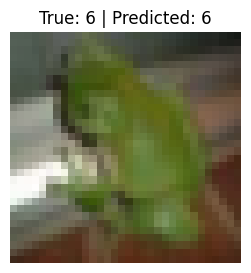

In [3]:
import matplotlib.pyplot as plt

# 7. Make a prediction on one sample
sample_idx = 7  # change index to see different samples
sample_image = np.expand_dims(X_test[sample_idx], axis=0)
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction[0])

print(f"Sample true label: {y_test[sample_idx]}")
print(f"Sample predicted class: {predicted_class}")

# --- Show the image with matplotlib ---
plt.figure(figsize=(4, 3))                             # Create a new figure
plt.imshow(X_test[sample_idx])          # Display the sample image
plt.title(f"True: {y_test[sample_idx]} | Predicted: {predicted_class}")
plt.axis('off')                         # Hide axis ticks
plt.show()                              # Render the plot